# Introduction to Geopandas

Geopandas is a package that builds on Pandas syntax, but allows you to work with geospatial data.  It has a number of dependencies, including fiona and shapely, but if you're using the class environment, you should be in good shape already.

In [2]:
import geopandas

In [2]:
# We'll import a few other tools we'll need now, too.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import statsmodels.api as sm
import statsmodels.formula.api as smf

Geopandas is probably most often used to load local data, like shapefiles.  For instance, if we download some <a target="_blank" href="https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/110m/cultural/ne_110m_admin_0_countries.zip">Nautral Earth</A> data and unzip it, we can load it.

In [3]:
df = geopandas.read_file("data/ne_110m_admin_0_countries.shp")
df.head()

featurecla  scalerank  LABELRANK                   SOVEREIGNT SOV_A3  \
0  Admin-0 country          1          6                         Fiji    FJI   
1  Admin-0 country          1          3  United Republic of Tanzania    TZA   
2  Admin-0 country          1          7               Western Sahara    SAH   
3  Admin-0 country          1          2                       Canada    CAN   
4  Admin-0 country          1          2     United States of America    US1   

   ADM0_DIF  LEVEL               TYPE                        ADMIN ADM0_A3  \
0         0      2  Sovereign country                         Fiji     FJI   
1         0      2  Sovereign country  United Republic of Tanzania     TZA   
2         0      2      Indeterminate               Western Sahara     SAH   
3         0      2  Sovereign country                       Canada     CAN   
4         1      2            Country     United States of America     USA   

   ...  NAME_KO                       NAME_NL            NAME_PL  \
0  ...       피지                          Fiji              Fidżi   
1  ...     탄자니아                      Tanzania           Tanzania   
2  ...     서사하라             Westelijke Sahara   Sahara Zachodnia   
3  ...      캐나다                        Canada             Kanada   
4  ...       미국  Verenigde Staten van Amerika  Stany Zjednoczone   

           NAME_PT                    NAME_RU     NAME_SV  \
0             Fiji                      Фиджи        Fiji   
1         Tanzânia                   Танзания    Tanzania   
2  Saara Ocidental            Западная Сахара  Västsahara   
3           Canadá                     Канада      Kanada   
4   Estados Unidos  Соединённые Штаты Америки         USA   

                       NAME_TR     NAME_VI NAME_ZH  \
0                         Fiji        Fiji      斐濟   
1                     Tanzanya    Tanzania    坦桑尼亚   
2                   Batı Sahra  Tây Sahara    西撒哈拉   
3                       Kanada      Canada     加拿大   
4  Amerika Birleşik Devletleri      Hoa Kỳ      美国   

                                            geometry  
0  MULTIPOLYGON (((180.00000 -16.06713, 180.00000...  
1  POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...  
2  POLYGON ((-8.66559 27.65643, -8.66512 27.58948...  
3  MULTIPOLYGON (((-122.84000 49.00000, -122.9742...  
4  MULTIPOLYGON (((-122.84000 49.00000, -120.0000...  

[5 rows x 95 columns]

In [4]:
# And here's a cool feature... you don't even need to unzip the shapefile:

df = geopandas.read_file("zip://data/ne_110m_admin_0_countries.zip")
df.head()

featurecla  scalerank  LABELRANK                   SOVEREIGNT SOV_A3  \
0  Admin-0 country          1          6                         Fiji    FJI   
1  Admin-0 country          1          3  United Republic of Tanzania    TZA   
2  Admin-0 country          1          7               Western Sahara    SAH   
3  Admin-0 country          1          2                       Canada    CAN   
4  Admin-0 country          1          2     United States of America    US1   

   ADM0_DIF  LEVEL               TYPE                        ADMIN ADM0_A3  \
0         0      2  Sovereign country                         Fiji     FJI   
1         0      2  Sovereign country  United Republic of Tanzania     TZA   
2         0      2      Indeterminate               Western Sahara     SAH   
3         0      2  Sovereign country                       Canada     CAN   
4         1      2            Country     United States of America     USA   

   ...  NAME_KO                       NAME_NL            NAME_PL  \
0  ...       피지                          Fiji              Fidżi   
1  ...     탄자니아                      Tanzania           Tanzania   
2  ...     서사하라             Westelijke Sahara   Sahara Zachodnia   
3  ...      캐나다                        Canada             Kanada   
4  ...       미국  Verenigde Staten van Amerika  Stany Zjednoczone   

           NAME_PT                    NAME_RU     NAME_SV  \
0             Fiji                      Фиджи        Fiji   
1         Tanzânia                   Танзания    Tanzania   
2  Saara Ocidental            Западная Сахара  Västsahara   
3           Canadá                     Канада      Kanada   
4   Estados Unidos  Соединённые Штаты Америки         USA   

                       NAME_TR     NAME_VI NAME_ZH  \
0                         Fiji        Fiji      斐濟   
1                     Tanzanya    Tanzania    坦桑尼亚   
2                   Batı Sahra  Tây Sahara    西撒哈拉   
3                       Kanada      Canada     加拿大   
4  Amerika Birleşik Devletleri      Hoa Kỳ      美国   

                                            geometry  
0  MULTIPOLYGON (((180.00000 -16.06713, 180.00000...  
1  POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...  
2  POLYGON ((-8.66559 27.65643, -8.66512 27.58948...  
3  MULTIPOLYGON (((-122.84000 49.00000, -122.9742...  
4  MULTIPOLYGON (((-122.84000 49.00000, -120.0000...  

[5 rows x 95 columns]

In [5]:
# You can also load data directly from a URL.  For instance:

url = "http://d2ad6b4ur7yvpq.cloudfront.net/naturalearth-3.3.0/ne_110m_land.geojson"
df = geopandas.read_file(url)
df.head()

scalerank featureclass                                           geometry
0          1      Country  POLYGON ((-59.57209 -80.04018, -59.86585 -80.5...
1          1      Country  POLYGON ((-159.20818 -79.49706, -161.12760 -79...
2          1      Country  POLYGON ((-45.15476 -78.04707, -43.92083 -78.4...
3          1      Country  POLYGON ((-121.21151 -73.50099, -119.91885 -73...
4          1      Country  POLYGON ((-125.55957 -73.48135, -124.03188 -73...

In [6]:
# And there are some preloaded maps use can use as well:

df = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
df.head()

pop_est      continent                      name iso_a3  gdp_md_est  \
0     920938        Oceania                      Fiji    FJI      8374.0   
1   53950935         Africa                  Tanzania    TZA    150600.0   
2     603253         Africa                 W. Sahara    ESH       906.5   
3   35623680  North America                    Canada    CAN   1674000.0   
4  326625791  North America  United States of America    USA  18560000.0   

                                            geometry  
0  MULTIPOLYGON (((180.00000 -16.06713, 180.00000...  
1  POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...  
2  POLYGON ((-8.66559 27.65643, -8.66512 27.58948...  
3  MULTIPOLYGON (((-122.84000 49.00000, -122.9742...  
4  MULTIPOLYGON (((-122.84000 49.00000, -120.0000...

In [7]:
# Or Geopackages!  (If your geopackage has more than one layer, you can specify which layer with the "layer=" argument)

df = geopandas.read_file('data/election.gpkg')
df.head(2)

STATEFP COUNTYFP  COUNTYNS        AFFGEOID  GEOID    NAME LSAD       ALAND  \
0      39      131  01074078  0500000US39131  39131    Pike   06  1140324458   
1      46      003  01266983  0500000US46003  46003  Aurora   06  1834813753   

     AWATER   FIPS  ...  gop_2012_prc  dem_2012_prc  gop_minus_dem_prc_2012  \
0   9567612  39131  ...         49.09         49.08                    0.01   
1  11201379  46003  ...         57.43         39.71                   17.72   

   gop_2016_votes  dem_2016_votes  totalvotes_2016  gop_2016_prc  \
0          7902.0          3539.0          11879.0         66.52   
1           974.0           340.0           1407.0         69.23   

   dem_2016_prc  gop_minus_dem_prc_2016  \
0         29.79                   36.73   
1         24.16                   45.07   

                                            geometry  
0  MULTIPOLYGON (((-83.35353 39.19758, -82.78589 ...  
1  MULTIPOLYGON (((-98.80777 43.93522, -98.33151 ...  

[2 rows x 41 columns]

In [8]:
# Writing out a shapefile (though be aware, not all formats are easily interchangeable!)

df.to_file('out/out.shp')

In [9]:
# But remember, it's just Pandas, so all those methods are there, too!
# This one writes out everything to an Excel file 
# (but pick your poison, CSV, tab-delimited, etc.)

df.to_excel('out/out.xlsx')

In [10]:
# Here's everything but the geometry (in the right-most column) is written to a CSV file.

df.iloc[:,:-1].to_csv('out/out.csv')

For more information, see the <a href="http://geopandas.org/io.html" target="_blank">Geopandas Input/Output (I/O) documentation</a>.

# Geopandas As Just Pandas

The beauty of using geopandas is that everything we've learned so far about working with data in Pandas still applies, only now we can read in our geodata directly.

In [11]:
df = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
df.columns.values

array(['pop_est', 'continent', 'name', 'iso_a3', 'gdp_md_est', 'geometry'],
      dtype=object)

## Calculations with numpy

In [12]:
# What's the median population of these countries?

np.median(df['pop_est'])

9961396.0

In [13]:
# What are the 5th and 95th percentile of GDP?

np.percentile(df['gdp_md_est'],[5,95])

array([   3182.4, 2716800. ])

## Calculating fields

In [14]:
df['gdp_per_capita'] = df['gdp_md_est'] / df['pop_est']

## Plotting with matplotlib

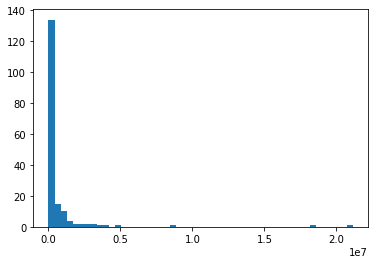

In [15]:
# Make a histogram of GDP:

_ = plt.hist(df['gdp_md_est'],bins=50)

# (the "hist" function returns bin information and counts, so we just collect it in a "garbage" variable)

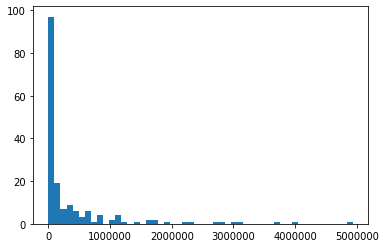

In [16]:
# Since the distribution is highly skewed, we might zoom in a bit, by only looking at countries with a GDP of less than 5 million.
# We're using the "loc" function in pandas to subset / make a selection.  This is what we generally refer to as "indexing" and 
# it follows the same conventions as numpy.  You can read more about indexing on the Pandas documentation:
# https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

_ = plt.hist(df.loc[df['gdp_md_est'] < 5000000,'gdp_md_est'],bins=50)

Text(0, 0.5, 'log(gdp)')

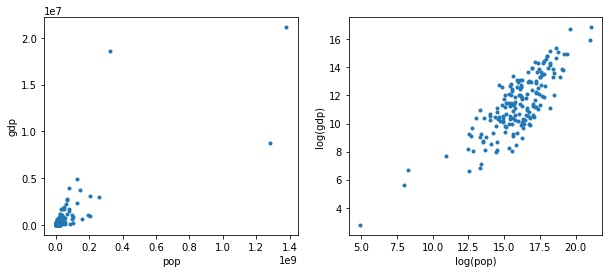

In [17]:
# Often our geographic data is crowded because it isn't distributed (remotely) normally.
# In this case, sometimes a log transform is quite helpful in bringing out the pattern.

plt.figure(figsize=(10,4))
plt.subplot(121)
plt.plot(df.pop_est,df.gdp_md_est,'.')
plt.xlabel('pop')
plt.ylabel('gdp')

plt.subplot(122)
plt.plot(np.log(df.pop_est),np.log(df.gdp_md_est),'.')
plt.xlabel('log(pop)')
plt.ylabel('log(gdp)')


## Plotting with Seaborn

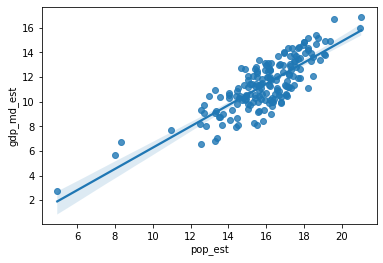

In [18]:
# We can use Seaborn to plot regressions (using a log transform to bring out detail).

seaborn.regplot(x=np.log(df['pop_est']),y=np.log(df['gdp_md_est']))

## Regressions with statsmodels

In [19]:
# Or statsmodels to run a regression on the data.

results = smf.ols(formula='np.log(gdp_md_est) ~ np.log(pop_est)',data=df).fit()

# Print the report
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:     np.log(gdp_md_est)   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.665
Method:                 Least Squares   F-statistic:                     350.1
Date:                Mon, 28 Sep 2020   Prob (F-statistic):           1.29e-43
Time:                        14:26:25   Log-Likelihood:                -290.02
No. Observations:                 177   AIC:                             584.0
Df Residuals:                     175   BIC:                             590.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -2.3530      0.741     

# More than Pandas

## Plotting

ImportError: The descartes package is required for plotting polygons in geopandas. You can install it using 'conda install -c conda-forge descartes' or 'pip install descartes'.

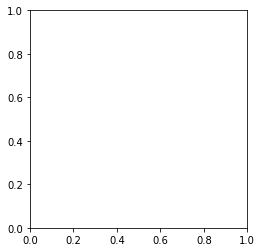

In [20]:
# Geopandas does more than just reads your data.  It also contains a mapping library to make choropleth maps:
    
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

world.plot()

## Choropleth Maps

In [ ]:
# We can subset our data, and construct choropleth maps

world = world[(world.pop_est>0) & (world.name!="Antarctica")]
world['gdp_per_cap'] = world.gdp_md_est / world.pop_est
world.plot(column='gdp_per_cap',cmap="hot")

In [ ]:
# You can tinker with matplotlib settings to have more control over how the final figure renders, and to save it
world = world[(world.pop_est>0) & (world.name!="Antarctica")]
world['gdp_per_cap'] = world.gdp_md_est / world.pop_est
world.plot(column='gdp_per_cap',cmap="hot")

plt.axis('off')
plt.savefig('out/geopandas_choropleth.png',dpi=300,bbox_inches='tight',pad_inches = 0)

## Layers

Layers are easily generated as well.  In this case, the first layer is plotted, and then the object from that is stored.  That "base" object is then passed to the next layer's plot method.

In [ ]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
cities = geopandas.read_file(geopandas.datasets.get_path('naturalearth_cities'))

base = world.plot(color='white', edgecolor='black')
cities.plot(ax=base, marker='o', color='red', markersize=5);

## Projections

Geopandas can project your data easily.  The most common way is to use EPSG codes, which can be looked up in many places.  I use <a href="http://spatialreference.org/" target="_blank">spatialreference.org</a>/

In [ ]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
# Remove Antarctica!
world = world[(world.name != "Antarctica") & (world.name != "Fr. S. Antarctic Lands")]
# Reproject and plot
world = world.to_crs(epsg=3395)
world.plot()

## More complicated projections

In [ ]:
# If your projection doesn't have an EPSG code, you can pass a Proj4 string to define a projection.
# Graticule and bounding box from natural earth: https://www.naturalearthdata.com/downloads/110m-physical-vectors/
# For all the defined colors, see https://python-graph-gallery.com/100-calling-a-color-with-seaborn/

proj4 = "+proj=natearth"

bounding_box = geopandas.read_file("zip://data/ne_110m_wgs84_bounding_box.zip")
bounding_box = bounding_box.to_crs(proj4)

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world = world[(world.name != "Antarctica") & (world.name != "Fr. S. Antarctic Lands")]
world = world.to_crs(proj4)

ax = bounding_box.plot(color='lightgray')
world.plot(ax=ax)
_ = plt.axis('off')
plt.savefig('out/natural_earth.png',dpi=300,bbox_inches='tight',pad_inches = 0)

# Geopandas is more than mapping

Geopandas doesn't have all the features of a GIS, but many are available.  Take a look at the documentation here:
<a href="http://geopandas.org/geometric_manipulations.html" target="_blank">http://geopandas.org/geometric_manipulations.html</a> to see the full list.  Calculating buffers, centroids, convex hulls, and simplifying geometry are all readily accessible.

In [ ]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
mexico = world[world.name == "Mexico"]
mexico.simplify(tolerance=.25).plot()

In [ ]:
world.centroid.plot()

In [ ]:
world.centroid.buffer(distance=4).plot(cmap="gist_ncar")

# Joining Data

In [ ]:
# Geopandas is just Pandas, so joins work exactly the same way: with with df.merge or with pd.concat
# Cartographic Boundary Files here: https://www.census.gov/geographies/mapping-files/time-series/geo/carto-boundary-file.html

geometry = geopandas.read_file('zip://data/cb_2018_us_state_20m.zip')
geometry.head(1)

In [ ]:
attribute_data = pd.read_csv('https://raw.githubusercontent.com/thomaspingel/geodata/master/election/state_election_data_1976-2016.csv')
attribute_data.head(1)

In [ ]:
group_data = pd.read_csv('https://raw.githubusercontent.com/thomaspingel/geodata/master/state_groups.csv')
group_data.head(1)

In [ ]:
df = geometry.merge(attribute_data,how='left',left_on='STUSPS',right_on='state_po')
df.head(1)

In [ ]:
df = df.merge(group_data,how='left',left_on='STUSPS',right_on='code')
df.head(1)

# Dissolving

In [ ]:
# We can group data with geopandas just as you'd expect, but we can also dissolve geometries with it:

sub_df = df[['gop_2016_votes','totalvotes_2016','division','geometry']]
groups = sub_df.dissolve(by='division',aggfunc='sum')
groups['gop_prc_2016'] = 100 * groups.gop_2016_votes / groups.totalvotes_2016
groups.head(2)

In [ ]:
groups.plot(column = 'gop_prc_2016', scheme='quantiles', cmap='YlOrRd');

In [ ]:
# A little ugly.  We can set the boundary easily with matplotlib, and add a legend:

groups.plot(column = 'gop_prc_2016', scheme='quantiles', cmap='YlOrRd', legend=True, legend_kwds={'loc': 'lower left'});
_ = plt.xlim([-180,-60])

# Selection using geocoordinates

In [ ]:
# Pandas lets us select spatially using the cx operator:

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
southern_world = world.cx[:, :0]
southern_world.plot(figsize=(10, 3));

# Creating a geodataframe from lat/long

See https://geopandas.org/gallery/create_geopandas_from_pandas.html for more details

In [ ]:
# We might have an excel or CSV document with lat/lon in them.  How do we turn this into a GEOdataframe, not just a dataframe?

n = 50
lat = np.random.randint(low=-90,high=90,size=(n))
lon = np.random.randint(low=-180,high=180,size=(n))
df = pd.DataFrame({'lat':lat,'lon':lon})
df.head(3)

In [ ]:
# We use the geopandas method .GeoDataFrame to construct the geodataframe and .points_from_xy to define the geometry

gdf = geopandas.GeoDataFrame(df, geometry=geopandas.points_from_xy(df.lon, df.lat))

In [ ]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
basemap = world.plot(color='white',edgecolor='black')
gdf.plot(ax=basemap,color='red')

# Adding a lat/lon column calculated from the geometry

In [6]:
gdf = geopandas.read_file(geopandas.datasets.get_path('naturalearth_cities'))
gdf['latitude'] = gdf.geometry.y
gdf['longitude'] = gdf.geometry.x
gdf.head()

name                   geometry   latitude   longitude
0  Vatican City  POINT (12.45339 41.90328)  41.903282   12.453387
1    San Marino  POINT (12.44177 43.93610)  43.936096   12.441770
2         Vaduz   POINT (9.51667 47.13372)  47.133724    9.516669
3    Luxembourg   POINT (6.13000 49.61166)  49.611660    6.130003
4       Palikir  POINT (158.14997 6.91664)   6.916644  158.149974

In [7]:
df = gdf.loc[:,['name','latitude','longitude']]
df.to_csv('out/geopandas_geometry_to_columns.csv')